In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.metrics import accuracy_score,mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline


In [3]:
df = pd.read_csv('Classification.CancerMB.csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df.shape

(569, 33)

In [7]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [8]:
df = df.drop({'Unnamed: 32','id'},axis=1)

In [9]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
df['diagnosis'] = df['diagnosis'].map({'M':0,'B':1})

<Axes: >

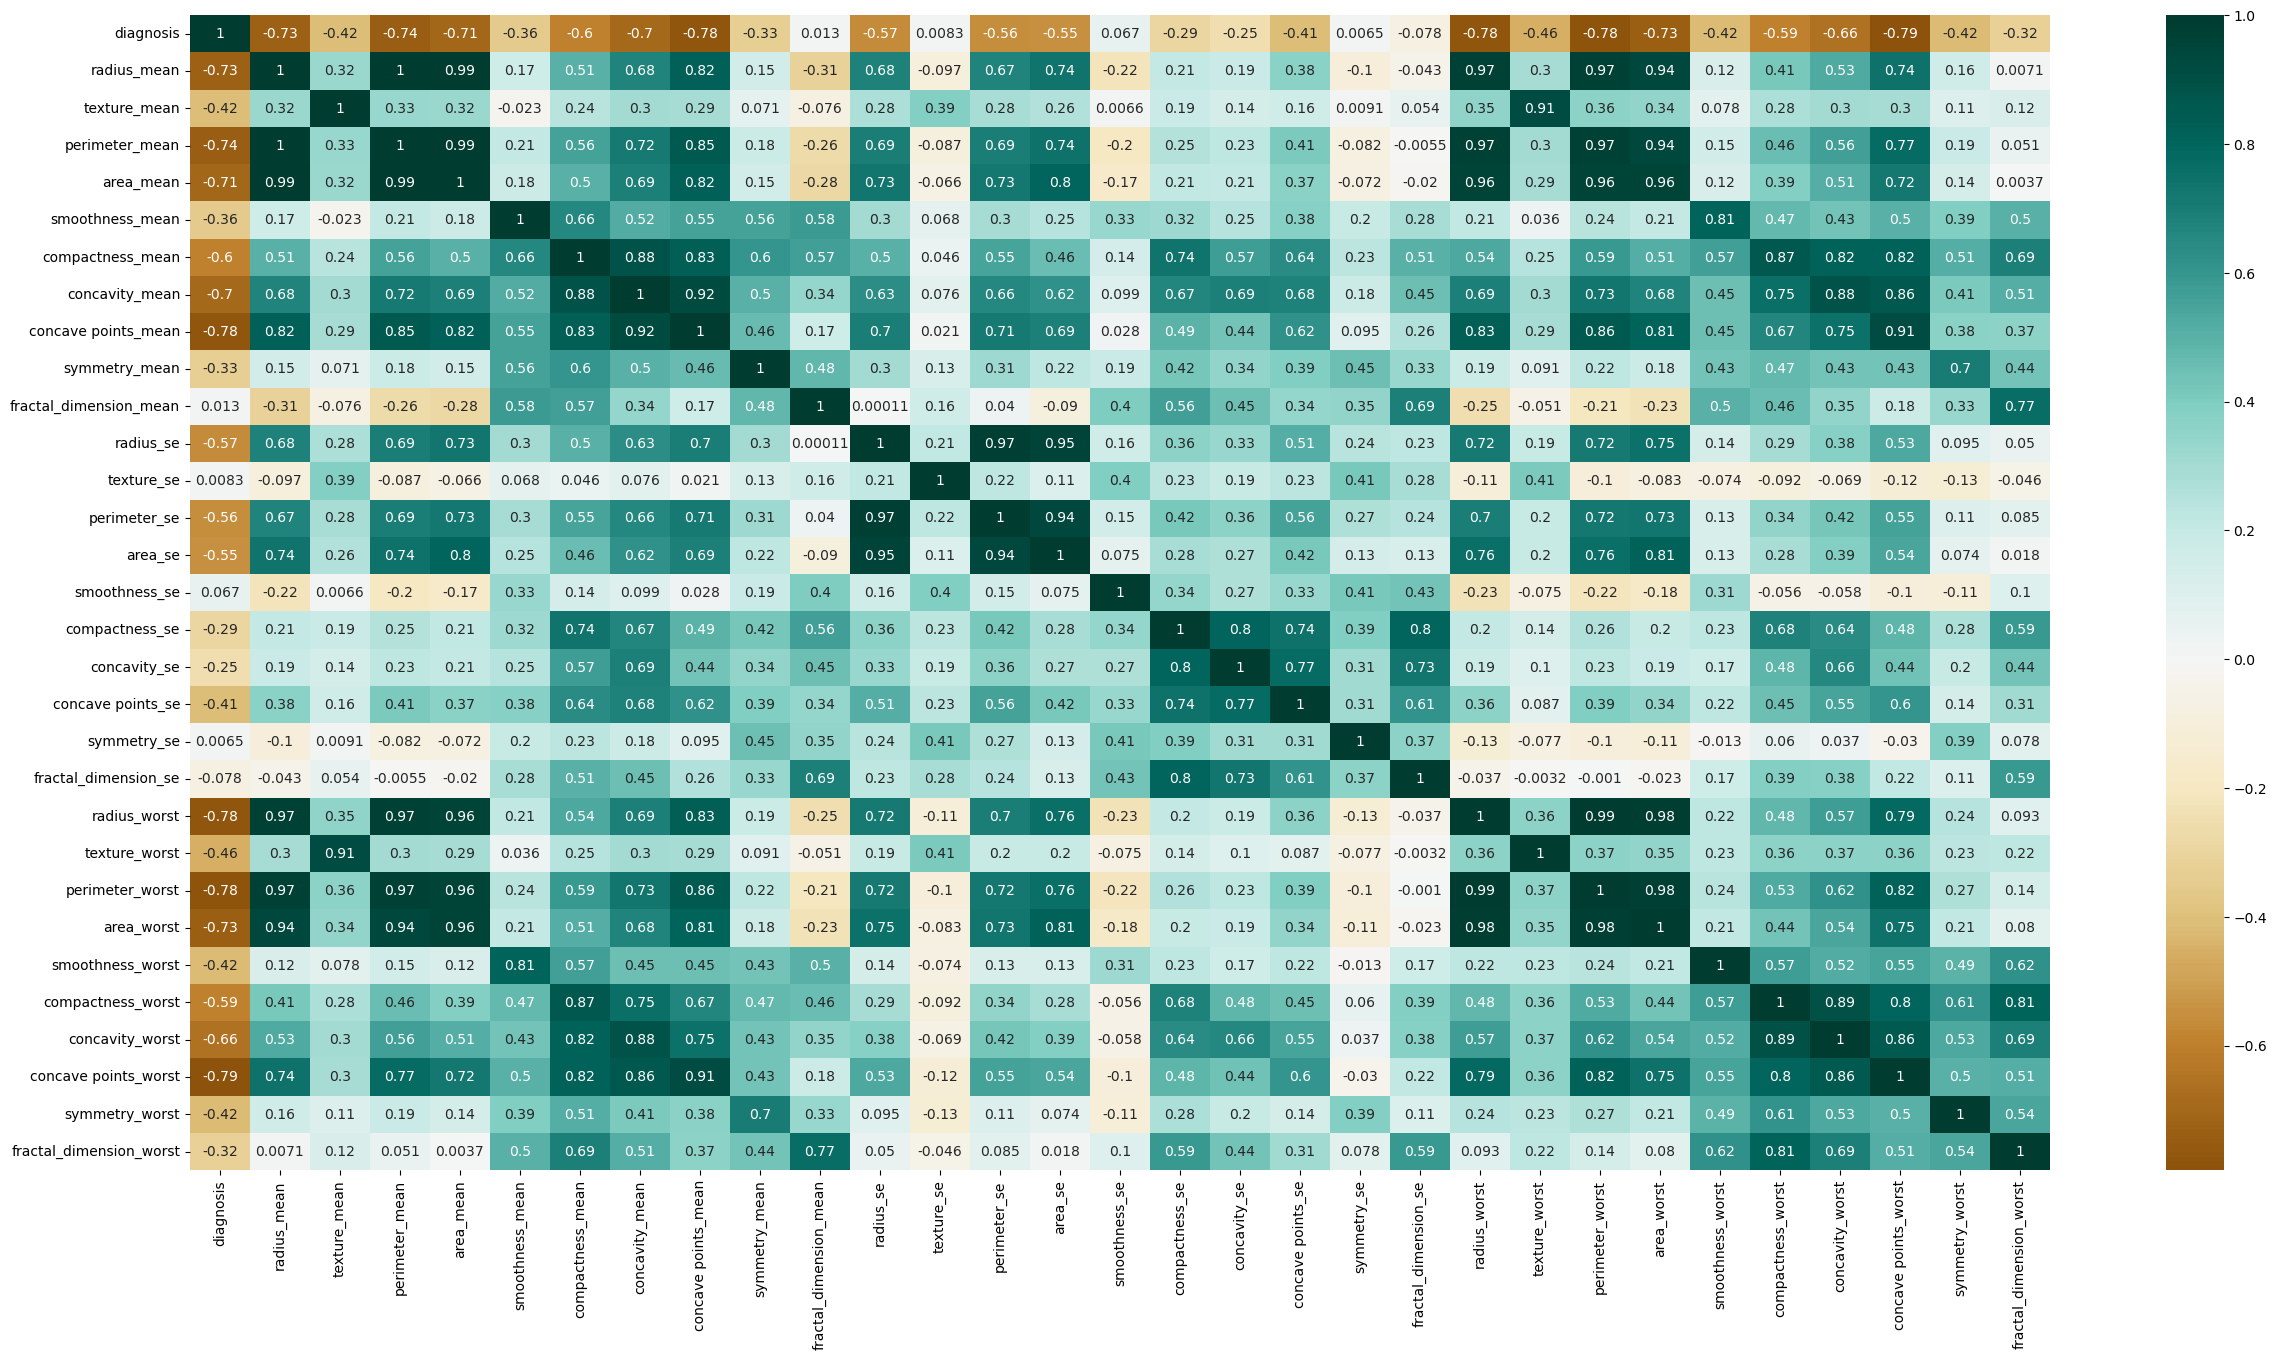

In [11]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(), center=0, cmap='BrBG', annot=True)

##It seems like dignosis has very small correlation with other parameters but they have strong correlation with each other so we can not directly drop any of the features 

In [12]:
x = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [13]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.1)
print(selector.fit_transform(x))

[[  17.99   10.38  122.8  ...   17.33  184.6  2019.  ]
 [  20.57   17.77  132.9  ...   23.41  158.8  1956.  ]
 [  19.69   21.25  130.   ...   25.53  152.5  1709.  ]
 ...
 [  16.6    28.08  108.3  ...   34.12  126.7  1124.  ]
 [  20.6    29.33  140.1  ...   39.42  184.6  1821.  ]
 [   7.76   24.54   47.92 ...   30.37   59.16  268.6 ]]


In [14]:
print(selector.get_support(indices=True))

[ 0  1  2  3 11 12 13 20 21 22 23]


In [15]:
num_cols = list(x.columns[selector.get_support(indices=True)])

print(num_cols)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'texture_se', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst']


In [16]:
x_t = x[num_cols]

x_t

,radius_mean,texture_mean,perimeter_mean,area_mean,texture_se,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst
0,17.99,10.38,122.80,1001.0,0.9053,8.589,153.40,25.380,17.33,184.60,2019.0
1,20.57,17.77,132.90,1326.0,0.7339,3.398,74.08,24.990,23.41,158.80,1956.0
2,19.69,21.25,130.00,1203.0,0.7869,4.585,94.03,23.570,25.53,152.50,1709.0
3,11.42,20.38,77.58,386.1,1.1560,3.445,27.23,14.910,26.50,98.87,567.7
4,20.29,14.34,135.10,1297.0,0.7813,5.438,94.44,22.540,16.67,152.20,1575.0
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,1.2560,7.673,158.70,25.450,26.40,166.10,2027.0
565,20.13,28.25,131.20,1261.0,2.4630,5.203,99.04,23.690,38.25,155.00,1731.0
566,16.60,28.08,108.30,858.1,1.0750,3.425,48.55,18.980,34.12,126.70,1124.0
567,20.60,29.33,140.10,1265.0,1.5950,5.772,86.22,25.740,39.42,184.60,1821.0


In [17]:
#Splitting dataset into train test
x_train,x_test,y_train,y_test = train_test_split(x_t,y,test_size = 0.2, random_state = 1)

def Master(model, model_name):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acuracy = accuracy_score(y_test, y_pred)
    
    print(model_name, "Accuracy : ", acuracy)
    print(classification_report(y_test,y_pred),'auc',roc_auc_score(y_test,y_pred))


In [18]:
#popeline
classifier = KNeighborsClassifier(n_neighbors = 5)

pipe = [('standard_Scaler',StandardScaler()),('classifier',classifier)]
pipe = Pipeline(pipe)

In [19]:
#Calling our master function
Master(pipe,'KNN')

KNN Accuracy :  0.9473684210526315
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        42
           1       0.92      1.00      0.96        72

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114
 auc 0.9285714285714286


In [20]:
steps = [('standardscaler',StandardScaler()),('classifier',LogisticRegression())]

In [21]:
pipe2 = Pipeline(steps)

In [22]:
#Calling our master function
Master(pipe2,'LogisticRegression')

LogisticRegression Accuracy :  0.9385964912280702
              precision    recall  f1-score   support

           0       0.97      0.86      0.91        42
           1       0.92      0.99      0.95        72

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114
 auc 0.9216269841269842


# For Wrapper Function

In [23]:
!pip install mlxtend

In [24]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [25]:
lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=14, forward=True, verbose=2, scoring='neg_mean_squared_error')

In [26]:
sfs1 = sfs1.fit(x, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.4s finished

[2024-03-27 21:27:38] Features: 1/14 -- score: -0.08913506353058036[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.2s finished

[2024-03-27 21:27:39] Features: 2/14 -- score: -0.075871729935776[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.2s finished

[2024-03-27 21:27:39] Features: 3/14 -- score: -0.07102737597319542[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Do

In [27]:
feat_names = list(sfs1.k_feature_names_)
feat_names

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'compactness_mean',
 'concave points_mean',
 'fractal_dimension_mean',
 'texture_se',
 'smoothness_se',
 'radius_worst',
 'texture_worst',
 'area_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [28]:
new_data = x[feat_names]

# first five rows of the new data
new_data.head()

,radius_mean,perimeter_mean,area_mean,compactness_mean,concave points_mean,fractal_dimension_mean,texture_se,smoothness_se,radius_worst,texture_worst,area_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,122.80,1001.0,0.27760,0.14710,0.07871,0.9053,0.006399,25.38,17.33,2019.0,0.2654,0.4601,0.11890
1,20.57,132.90,1326.0,0.07864,0.07017,0.05667,0.7339,0.005225,24.99,23.41,1956.0,0.1860,0.2750,0.08902
2,19.69,130.00,1203.0,0.15990,0.12790,0.05999,0.7869,0.006150,23.57,25.53,1709.0,0.2430,0.3613,0.08758
3,11.42,77.58,386.1,0.28390,0.10520,0.09744,1.1560,0.009110,14.91,26.50,567.7,0.2575,0.6638,0.17300
4,20.29,135.10,1297.0,0.13280,0.10430,0.05883,0.7813,0.011490,22.54,16.67,1575.0,0.1625,0.2364,0.07678


In [29]:
new_data.shape, x.shape

((569, 14), (569, 30))

In [30]:
x_train,x_test,y_train,y_test = train_test_split(new_data,y,test_size = 0.2, random_state = 1)

In [31]:
#Calling our master function
Master(pipe,'KNN')

KNN Accuracy :  0.9473684210526315
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114
 auc 0.9384920634920635


In [32]:
#Calling our master function
Master(pipe2,'LogisticRegression')

LogisticRegression Accuracy :  0.9649122807017544
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        42
           1       0.95      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114
 auc 0.9523809523809523


In [33]:
lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=14, forward=False, verbose=2, scoring='neg_mean_squared_error')

In [34]:
sfs1 = sfs1.fit(x, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished

[2024-03-27 21:27:43] Features: 29/14 -- score: -0.06312230652594665[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.3s finished

[2024-03-27 21:27:44] Features: 28/14 -- score: -0.06223347451841005[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.5s finished

[2024-03-27 21:27:44] Features: 27/14 -- score: -0.061474689722028034[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1

In [35]:
feat_names_back = list(sfs1.k_feature_names_)
feat_names_back

['radius_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_se',
 'smoothness_se',
 'concavity_se',
 'concave points_se',
 'radius_worst',
 'texture_worst',
 'area_worst',
 'compactness_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [36]:
new_data_back = x[feat_names_back]

# first five rows of the new data
new_data_back.head()

,radius_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,smoothness_se,concavity_se,concave points_se,radius_worst,texture_worst,area_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
0,17.99,0.27760,0.3001,0.14710,1.0950,0.006399,0.05373,0.01587,25.38,17.33,2019.0,0.6656,0.4601,0.11890
1,20.57,0.07864,0.0869,0.07017,0.5435,0.005225,0.01860,0.01340,24.99,23.41,1956.0,0.1866,0.2750,0.08902
2,19.69,0.15990,0.1974,0.12790,0.7456,0.006150,0.03832,0.02058,23.57,25.53,1709.0,0.4245,0.3613,0.08758
3,11.42,0.28390,0.2414,0.10520,0.4956,0.009110,0.05661,0.01867,14.91,26.50,567.7,0.8663,0.6638,0.17300
4,20.29,0.13280,0.1980,0.10430,0.7572,0.011490,0.05688,0.01885,22.54,16.67,1575.0,0.2050,0.2364,0.07678


In [37]:
new_data.shape, x.shape

((569, 14), (569, 30))

In [38]:
x_train,x_test,y_train,y_test = train_test_split(new_data_back,y,test_size = 0.2, random_state = 1)

In [39]:
#Calling our master function
Master(pipe,'KNN')

KNN Accuracy :  0.9385964912280702
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        42
           1       0.93      0.97      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114
 auc 0.9265873015873016


In [40]:
#Calling our master function
Master(pipe2,'LogisticRegression')

LogisticRegression Accuracy :  0.9649122807017544
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        42
           1       0.95      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114
 auc 0.9523809523809523


In [41]:
# Importing PCA
from sklearn.decomposition import PCA

# Let's say, 
n_components = 2
pca = PCA(n_components=n_components)
pca.fit(x)
x_pca = pca.transform(x)

# Create the dataframe
df_pca1 = pd.DataFrame(x_pca,
					columns=['PC{}'.
					format(i+1)
						for i in range(n_components)])
print(df_pca1)


             PC1         PC2
0    1160.142574 -293.917544
1    1269.122443   15.630182
2     995.793889   39.156743
3    -407.180803  -67.380320
4     930.341180  189.340742
..           ...         ...
564  1414.126684  110.222492
565  1045.018854   77.057589
566   314.501756   47.553525
567  1124.858115   34.129225
568  -771.527622  -88.643106

[569 rows x 2 columns]


In [42]:
x_train,x_test,y_train,y_test = train_test_split(df_pca1,y,test_size = 0.2, random_state = 1)

In [43]:
#Calling our master function
Master(pipe,'KNN')

KNN Accuracy :  0.9210526315789473
              precision    recall  f1-score   support

           0       0.97      0.81      0.88        42
           1       0.90      0.99      0.94        72

    accuracy                           0.92       114
   macro avg       0.94      0.90      0.91       114
weighted avg       0.93      0.92      0.92       114
 auc 0.8978174603174603


In [44]:
#Calling our master function
Master(pipe2,'LogisticRegression')

LogisticRegression Accuracy :  0.8947368421052632
              precision    recall  f1-score   support

           0       0.94      0.76      0.84        42
           1       0.88      0.97      0.92        72

    accuracy                           0.89       114
   macro avg       0.91      0.87      0.88       114
weighted avg       0.90      0.89      0.89       114
 auc 0.867063492063492


In [45]:
df =pd.read_csv('Regression.Life.Expectancy.csv')

In [46]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [47]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [48]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [49]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [50]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [51]:
labelencoder = LabelEncoder()
df['Country'] = labelencoder.fit_transform(df['Country'])
df['Status'] = labelencoder.fit_transform(df['Status'])

In [52]:
df.mean()

Country                            9.509632e+01
Year                               2.007519e+03
Status                             8.257318e-01
Life expectancy                    6.922493e+01
Adult Mortality                    1.647964e+02
infant deaths                      3.030395e+01
Alcohol                            4.602861e+00
percentage expenditure             7.382513e+02
Hepatitis B                        8.094046e+01
Measles                            2.419592e+03
 BMI                               3.832125e+01
under-five deaths                  4.203574e+01
Polio                              8.255019e+01
Total expenditure                  5.938190e+00
Diphtheria                         8.232408e+01
 HIV/AIDS                          1.742103e+00
GDP                                7.483158e+03
Population                         1.275338e+07
 thinness  1-19 years              4.839704e+00
 thinness 5-9 years                4.870317e+00
Income composition of resources    6.275

In [53]:
df = df.fillna(df.mean())

In [54]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [55]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [56]:
x_reg = df.drop('Life expectancy ',axis = 1)

In [57]:
x_reg.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [58]:
y = df['Life expectancy ']

In [59]:
y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy , dtype: float64

<Axes: >

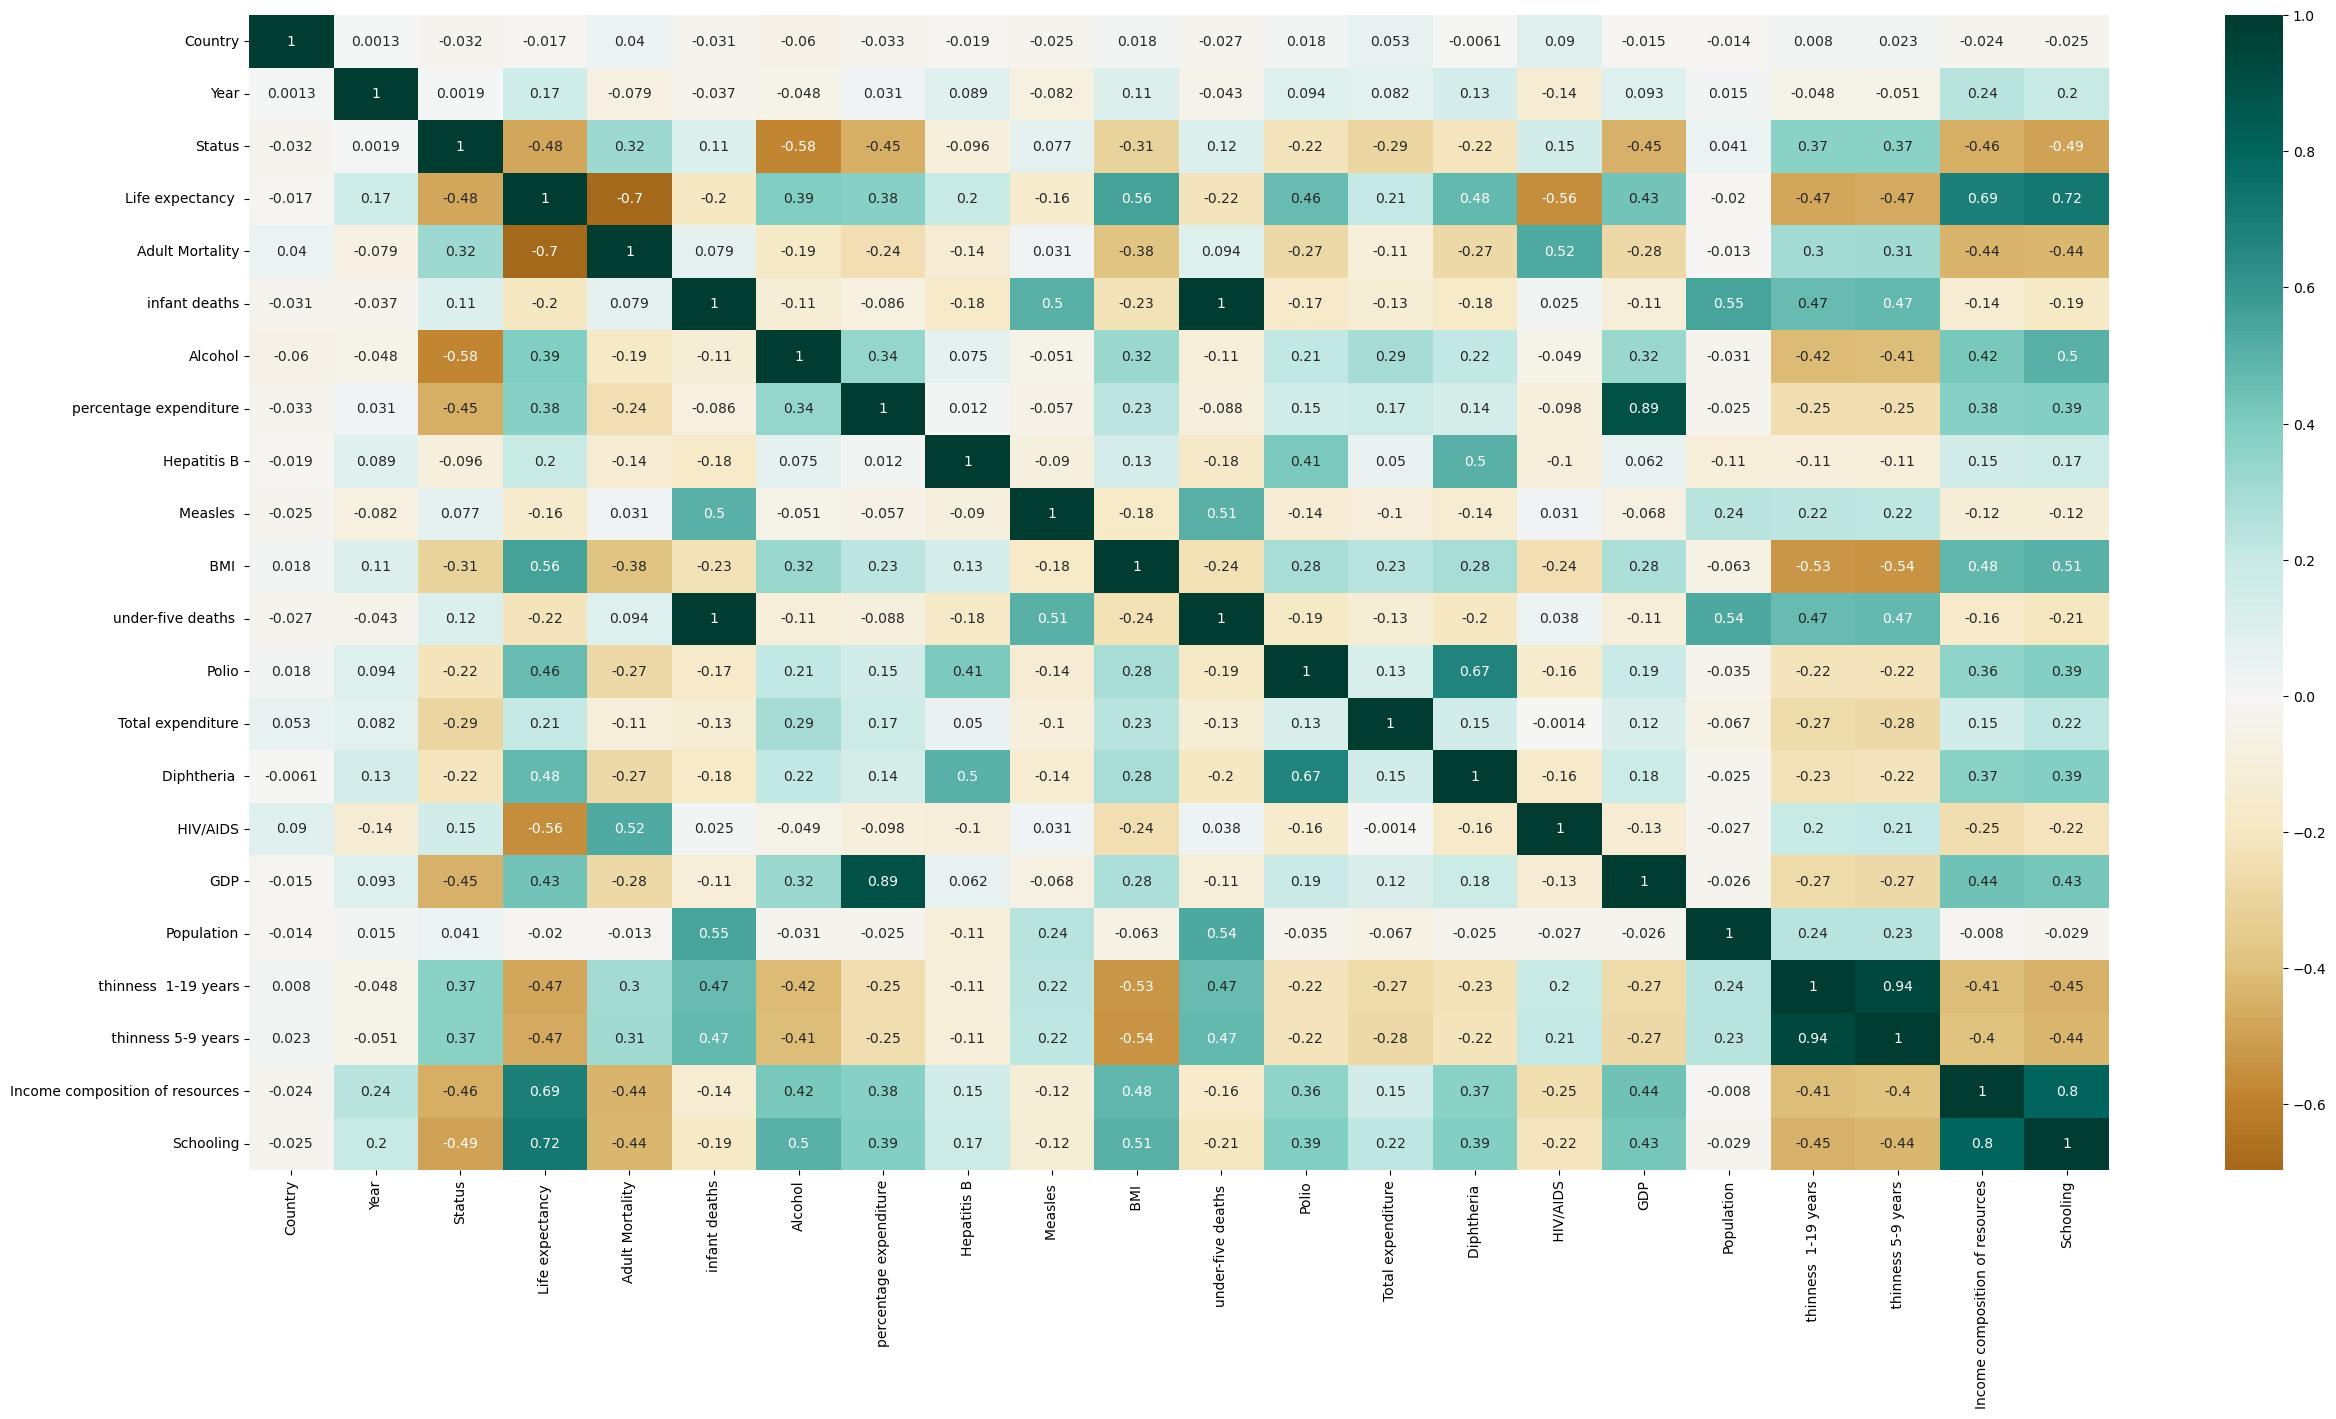

In [60]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(), center=0, cmap='BrBG', annot=True)

##As one can see that Life expectancy has almost zero correlation with country ,measeles and population so it will be better to remove these
two features

In [61]:
x_reg = x_reg.drop(['Population','Country','Measles '],axis=1)

In [62]:
x_reg.head()

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,1,263.0,62,0.01,71.279624,65.0,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,2014,1,271.0,64,0.01,73.523582,62.0,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,2013,1,268.0,66,0.01,73.219243,64.0,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,2012,1,272.0,69,0.01,78.184215,67.0,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,2011,1,275.0,71,0.01,7.097109,68.0,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5


In [63]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
print(selector.fit_transform(x_reg))

[[2.015e+03 1.000e+00 2.630e+02 ... 1.730e+01 4.790e-01 1.010e+01]
 [2.014e+03 1.000e+00 2.710e+02 ... 1.750e+01 4.760e-01 1.000e+01]
 [2.013e+03 1.000e+00 2.680e+02 ... 1.770e+01 4.700e-01 9.900e+00]
 ...
 [2.002e+03 1.000e+00 7.300e+01 ... 1.300e+00 4.270e-01 1.000e+01]
 [2.001e+03 1.000e+00 6.860e+02 ... 1.700e+00 4.270e-01 9.800e+00]
 [2.000e+03 1.000e+00 6.650e+02 ... 1.120e+01 4.340e-01 9.800e+00]]


In [64]:
print(selector.get_support(indices=True))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


In [65]:
num_cols = list(x_reg.columns[selector.get_support(indices=True)])

print(num_cols)

['Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [66]:
x_reg = x_reg[num_cols]

x_reg


,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,1,263.0,62,0.01,71.279624,65.0,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,2014,1,271.0,64,0.01,73.523582,62.0,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,2013,1,268.0,66,0.01,73.219243,64.0,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,2012,1,272.0,69,0.01,78.184215,67.0,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,2011,1,275.0,71,0.01,7.097109,68.0,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,1,723.0,27,4.36,0.000000,68.0,27.1,42,67.0,7.13,65.0,33.6,454.366654,9.4,9.4,0.407,9.2
2934,2003,1,715.0,26,4.06,0.000000,7.0,26.7,41,7.0,6.52,68.0,36.7,453.351155,9.8,9.9,0.418,9.5
2935,2002,1,73.0,25,4.43,0.000000,73.0,26.3,40,73.0,6.53,71.0,39.8,57.348340,1.2,1.3,0.427,10.0
2936,2001,1,686.0,25,1.72,0.000000,76.0,25.9,39,76.0,6.16,75.0,42.1,548.587312,1.6,1.7,0.427,9.8


In [67]:
#Splitting dataset into train test




def Master2(model, model_name):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acuracy = r2_score(y_test, y_pred)
    #acuracy = accuracy_score(y_test, y_pred)
    
    print(model_name, "Accuracy : ", acuracy)
    print(mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred))
    #print(classification_report(y_test,y_pred),'auc',roc_auc_score(y_test,y_pred))

    #print(model_name, " : ", acuracy)


In [68]:
steps1 = [('standardscaler',StandardScaler()),('classifier',LinearRegression())]

In [69]:
pipe3 = Pipeline(steps1)


In [70]:
x_train,x_test,y_train,y_test = train_test_split(x_reg,y,test_size = 0.2, random_state = 1)

In [71]:
Master2(pipe3,'LinearRegression')

LinearRegression Accuracy :  0.7954267393571265
3.137099319771831 17.672618329386875 0.7954267393571265


In [72]:
from sklearn.linear_model import ElasticNet

In [73]:
steps2 = [('standardscaler',StandardScaler()),('classifier',ElasticNet())]

In [74]:
pipe4 = Pipeline(steps2)


In [75]:
Master2(pipe4,'ElasticNet')

ElasticNet Accuracy :  0.7577118072584721
3.4336415342365507 20.930725465205654 0.7577118072584721


In [76]:
## Wrapper Functions

In [77]:
sfs1 = sfs1.fit(x_reg, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.2s finished

[2024-03-27 21:27:52] Features: 17/14 -- score: -18.3128467582953[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.2s finished

[2024-03-27 21:27:53] Features: 16/14 -- score: -18.237109617036175[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished

[2024-03-27 21:27:53] Features: 15/14 -- score: -18.208128407935998[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Do

In [78]:
feat_names_back_reg = list(sfs1.k_feature_names_)
feat_names_back_reg

['Year',
 'Status',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'Hepatitis B',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Income composition of resources',
 'Schooling']

In [79]:
new_data_back_reg = x_reg[feat_names_back_reg]

# first five rows of the new data
new_data_back_reg.head()

,Year,Status,Adult Mortality,infant deaths,Alcohol,Hepatitis B,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Income composition of resources,Schooling
0,2015,1,263.0,62,0.01,65.0,19.1,83,6.0,65.0,0.1,584.259210,0.479,10.1
1,2014,1,271.0,64,0.01,62.0,18.6,86,58.0,62.0,0.1,612.696514,0.476,10.0
2,2013,1,268.0,66,0.01,64.0,18.1,89,62.0,64.0,0.1,631.744976,0.470,9.9
3,2012,1,272.0,69,0.01,67.0,17.6,93,67.0,67.0,0.1,669.959000,0.463,9.8
4,2011,1,275.0,71,0.01,68.0,17.2,97,68.0,68.0,0.1,63.537231,0.454,9.5


In [80]:
new_data_back_reg.shape, x_reg.shape

((2938, 14), (2938, 18))

In [81]:
x_train,x_test,y_train,y_test = train_test_split(new_data_back_reg,y,test_size = 0.2, random_state = 1)

In [82]:
Master2(pipe3,'LinearRegression')

LinearRegression Accuracy :  0.7949887767402497
3.151190244238836 17.71045292295145 0.7949887767402497


In [83]:
Master2(pipe4,'ElasticNet')

ElasticNet Accuracy :  0.7581262932483153
3.423589305934442 20.89491896401211 0.7581262932483153


In [84]:
# Let's say, 
n_components = 6
pca = PCA(n_components=n_components)
pca.fit(x_reg)
x_pca_reg = pca.transform(x_reg)

# Create the dataframe
df_pca1_reg = pd.DataFrame(x_pca_reg,
					columns=['PC{}'.
					format(i+1)
						for i in range(n_components)])
print(df_pca1_reg)



              PC1         PC2        PC3         PC4        PC5        PC6
0    -6926.450608 -262.749811  46.392991   82.177746  54.034637 -23.443668
1    -6897.979456 -261.133942  49.600124   87.903163  26.544149  -5.207592
2    -6879.139353 -258.286711  52.912334   84.464378  22.177234  -5.521342
3    -6840.620683 -258.108857  57.993330   87.826621  15.515823  -5.794226
4    -7451.112458 -268.829567  61.351863   88.898269  13.364593  -6.102736
...           ...         ...        ...         ...        ...        ...
2933 -7065.793581 -209.747479  18.572121  539.995113 -16.349961  17.229224
2934 -7066.803220 -210.096695  19.160137  536.139833  47.821300  39.865729
2935 -7457.543510 -261.953483 -24.383467 -107.576050  22.848085  -8.451710
2936 -6972.311711 -197.032379  12.333976  502.798039 -28.725056  14.399406
2937 -6973.473679 -197.151342  10.524070  481.864566 -31.377633  11.001728

[2938 rows x 6 columns]


In [85]:
x_train,x_test,y_train,y_test = train_test_split(df_pca1_reg,y,test_size = 0.2, random_state = 1)

In [86]:
Master2(pipe3,'LinearRegression')

LinearRegression Accuracy :  0.657012605886006
3.8903749424233482 29.62990025636455 0.657012605886006


In [87]:
Master2(pipe4,'ElasticNet')

ElasticNet Accuracy :  0.549907618827415
4.754579171404812 38.882456291851184 0.549907618827415
